# TIKTOK Songs 2021 DATASET

**Introduction**

**In this notebook we are going to explore the dataset regarding popular tracks on tiktok in 2021**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [206]:
df=pd.read_csv("TikTok_songs_2021.csv")
df

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,STAY (with Justin Bieber),The Kid LAROI,83,STAY (with Justin Bieber),89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806
1,Peaches (feat. Daniel Caesar & Giveon),Justin Bieber,90,Justice,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082
2,edamame (feat. Rich Brian),bbno$,72,edamame (feat. Rich Brian),77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707
3,Here's Your Perfect,Jamie Miller,65,Here's Your Perfect,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594
4,It's You,Sezairi,57,It's You,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Panda,Desiigner,63,Panda,67,0.685,0.731,-5.503,0,10,0.4140,0.0292,0.000000,0.3690,0.266,145.245,4,247867
186,TO THE MOON,Jnr Choi,63,TO THE MOON,79,0.745,0.650,-11.814,1,2,0.3460,0.0451,0.007580,0.1110,0.386,144.047,4,152137
187,Upside Down,JVKE,71,Upside Down,65,0.880,0.501,-6.774,1,2,0.0620,0.0494,0.069500,0.4360,0.459,120.038,4,114500
188,lowkey,NIKI,75,lowkey,76,0.752,0.494,-8.180,1,0,0.0559,0.4320,0.000000,0.0869,0.227,117.901,4,171356


In [207]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [208]:
df1=df.dropna()

In [209]:
df1.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [210]:
df1.nunique()

track_name          189
artist_name         156
artist_pop           53
album               174
track_pop            58
danceability        150
energy              157
loudness            186
mode                  2
key                  12
speechiness         176
acousticness        179
instrumentalness     84
liveness            157
valence             170
tempo               188
time_signature        4
duration_ms         189
dtype: int64

In [211]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        190 non-null    object 
 1   artist_name       190 non-null    object 
 2   artist_pop        190 non-null    int64  
 3   album             190 non-null    object 
 4   track_pop         190 non-null    int64  
 5   danceability      190 non-null    float64
 6   energy            190 non-null    float64
 7   loudness          190 non-null    float64
 8   mode              190 non-null    int64  
 9   key               190 non-null    int64  
 10  speechiness       190 non-null    float64
 11  acousticness      190 non-null    float64
 12  instrumentalness  190 non-null    float64
 13  liveness          190 non-null    float64
 14  valence           190 non-null    float64
 15  tempo             190 non-null    float64
 16  time_signature    190 non-null    int64  
 1

In [212]:
df1.shape

(190, 18)

In [213]:
df1.dtypes

track_name           object
artist_name          object
artist_pop            int64
album                object
track_pop             int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_ms           int64
dtype: object

In [214]:
df1.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [215]:
cat=df1.select_dtypes("object")

In [216]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

track_name=le.fit_transform(cat["track_name"])
artist_name=le.fit_transform(cat["artist_name"])
album=le.fit_transform(cat["album"])
df=df1.drop(["track_name","artist_name","album"],axis=1)

In [217]:
for col in cat:
    le = preprocessing.LabelEncoder()
    cat[col]=le.fit_transform(cat[col])

In [218]:
cat

,track_name,artist_name,album
0,114,139,117
1,101,69,67
2,175,149,164
3,54,60,56
4,66,128,65
...,...,...,...
185,99,38,101
186,137,67,130
187,151,59,147
188,182,101,169


In [219]:
df1=pd.concat([df,cat], axis=1)
df1

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_name,artist_name,album
0,83,89,0.591,0.764,-5.484,1,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806,114,139,117
1,90,86,0.677,0.696,-6.181,1,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082,101,69,67
2,72,77,0.815,0.848,-4.704,0,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707,175,149,164
3,65,77,0.558,0.454,-5.335,1,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594,54,60,56
4,57,73,0.630,0.456,-8.285,1,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440,66,128,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,63,67,0.685,0.731,-5.503,0,10,0.4140,0.0292,0.000000,0.3690,0.266,145.245,4,247867,99,38,101
186,63,79,0.745,0.650,-11.814,1,2,0.3460,0.0451,0.007580,0.1110,0.386,144.047,4,152137,137,67,130
187,71,65,0.880,0.501,-6.774,1,2,0.0620,0.0494,0.069500,0.4360,0.459,120.038,4,114500,151,59,147
188,75,76,0.752,0.494,-8.180,1,0,0.0559,0.4320,0.000000,0.0869,0.227,117.901,4,171356,182,101,169


In [238]:
df=df1.drop(["mode"],axis=1)
df

,artist_pop,track_pop,danceability,energy,loudness,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_name,artist_name,album
0,83,89,0.591,0.764,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4,141806,114,139,117
1,90,86,0.677,0.696,-6.181,0,0.1190,0.3210,0.000000,0.4200,0.464,90.030,4,198082,101,69,67
2,72,77,0.815,0.848,-4.704,4,0.1150,0.0230,0.000162,0.0265,0.684,106.032,4,133707,175,149,164
3,65,77,0.558,0.454,-5.335,6,0.0551,0.4990,0.000000,0.1460,0.424,113.120,4,158594,54,60,56
4,57,73,0.630,0.456,-8.285,8,0.0317,0.5450,0.000000,0.1140,0.166,137.915,3,251440,66,128,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,63,67,0.685,0.731,-5.503,10,0.4140,0.0292,0.000000,0.3690,0.266,145.245,4,247867,99,38,101
186,63,79,0.745,0.650,-11.814,2,0.3460,0.0451,0.007580,0.1110,0.386,144.047,4,152137,137,67,130
187,71,65,0.880,0.501,-6.774,2,0.0620,0.0494,0.069500,0.4360,0.459,120.038,4,114500,151,59,147
188,75,76,0.752,0.494,-8.180,0,0.0559,0.4320,0.000000,0.0869,0.227,117.901,4,171356,182,101,169


In [239]:
df.isnull().sum()

artist_pop          0
track_pop           0
danceability        0
energy              0
loudness            0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
track_name          0
artist_name         0
album               0
dtype: int64

In [240]:
df.corr()

,artist_pop,track_pop,danceability,energy,loudness,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_name,artist_name,album
artist_pop,1.000000,0.392426,-0.121138,0.036900,0.049380,0.041796,-0.110647,-0.071358,-0.178067,0.124814,-0.044843,-0.005513,-0.096451,0.224301,0.056779,-0.146736,-0.063874
track_pop,0.392426,1.000000,-0.121417,0.133059,0.224693,0.015737,-0.076365,-0.109066,-0.076157,-0.051814,-0.114455,-0.035340,0.027652,0.186011,-0.089100,0.083399,-0.115480
danceability,-0.121138,-0.121417,1.000000,-0.034194,0.083865,0.108525,-0.032192,-0.175339,0.097798,-0.080967,0.228097,-0.260257,0.138919,-0.123366,-0.100279,-0.126710,0.023101
energy,0.036900,0.133059,-0.034194,1.000000,0.685179,0.079248,-0.060355,-0.549075,0.081301,0.088211,0.277715,0.007821,0.181281,0.097740,-0.033580,-0.047699,-0.079487
loudness,0.049380,0.224693,0.083865,0.685179,1.000000,0.103494,-0.172531,-0.355338,0.098946,-0.068680,0.233449,0.019126,0.122048,0.091599,-0.141803,-0.077225,-0.074609
key,0.041796,0.015737,0.108525,0.079248,0.103494,1.000000,0.130550,0.013777,-0.006243,-0.026330,0.078196,-0.000778,0.032067,0.183202,0.034322,-0.072511,-0.073637
speechiness,-0.110647,-0.076365,-0.032192,-0.060355,-0.172531,0.130550,1.000000,0.076188,-0.064111,-0.028197,-0.023041,0.164566,0.062309,-0.033184,0.052181,-0.084646,0.053375
acousticness,-0.071358,-0.109066,-0.175339,-0.549075,-0.355338,0.013777,0.076188,1.000000,-0.096317,-0.039830,-0.161401,0.020043,-0.128940,0.028129,0.170718,0.092193,0.083415
instrumentalness,-0.178067,-0.076157,0.097798,0.081301,0.098946,-0.006243,-0.064111,-0.096317,1.000000,0.069778,-0.037085,0.002559,0.023098,-0.056960,-0.050846,-0.002834,-0.054322
liveness,0.124814,-0.051814,-0.080967,0.088211,-0.068680,-0.026330,-0.028197,-0.039830,0.069778,1.000000,-0.009745,0.060093,-0.048952,0.028812,-0.078037,-0.107151,-0.145105


# Visualizing the dataset through a Pairplot

<Figure size 720x720 with 0 Axes>

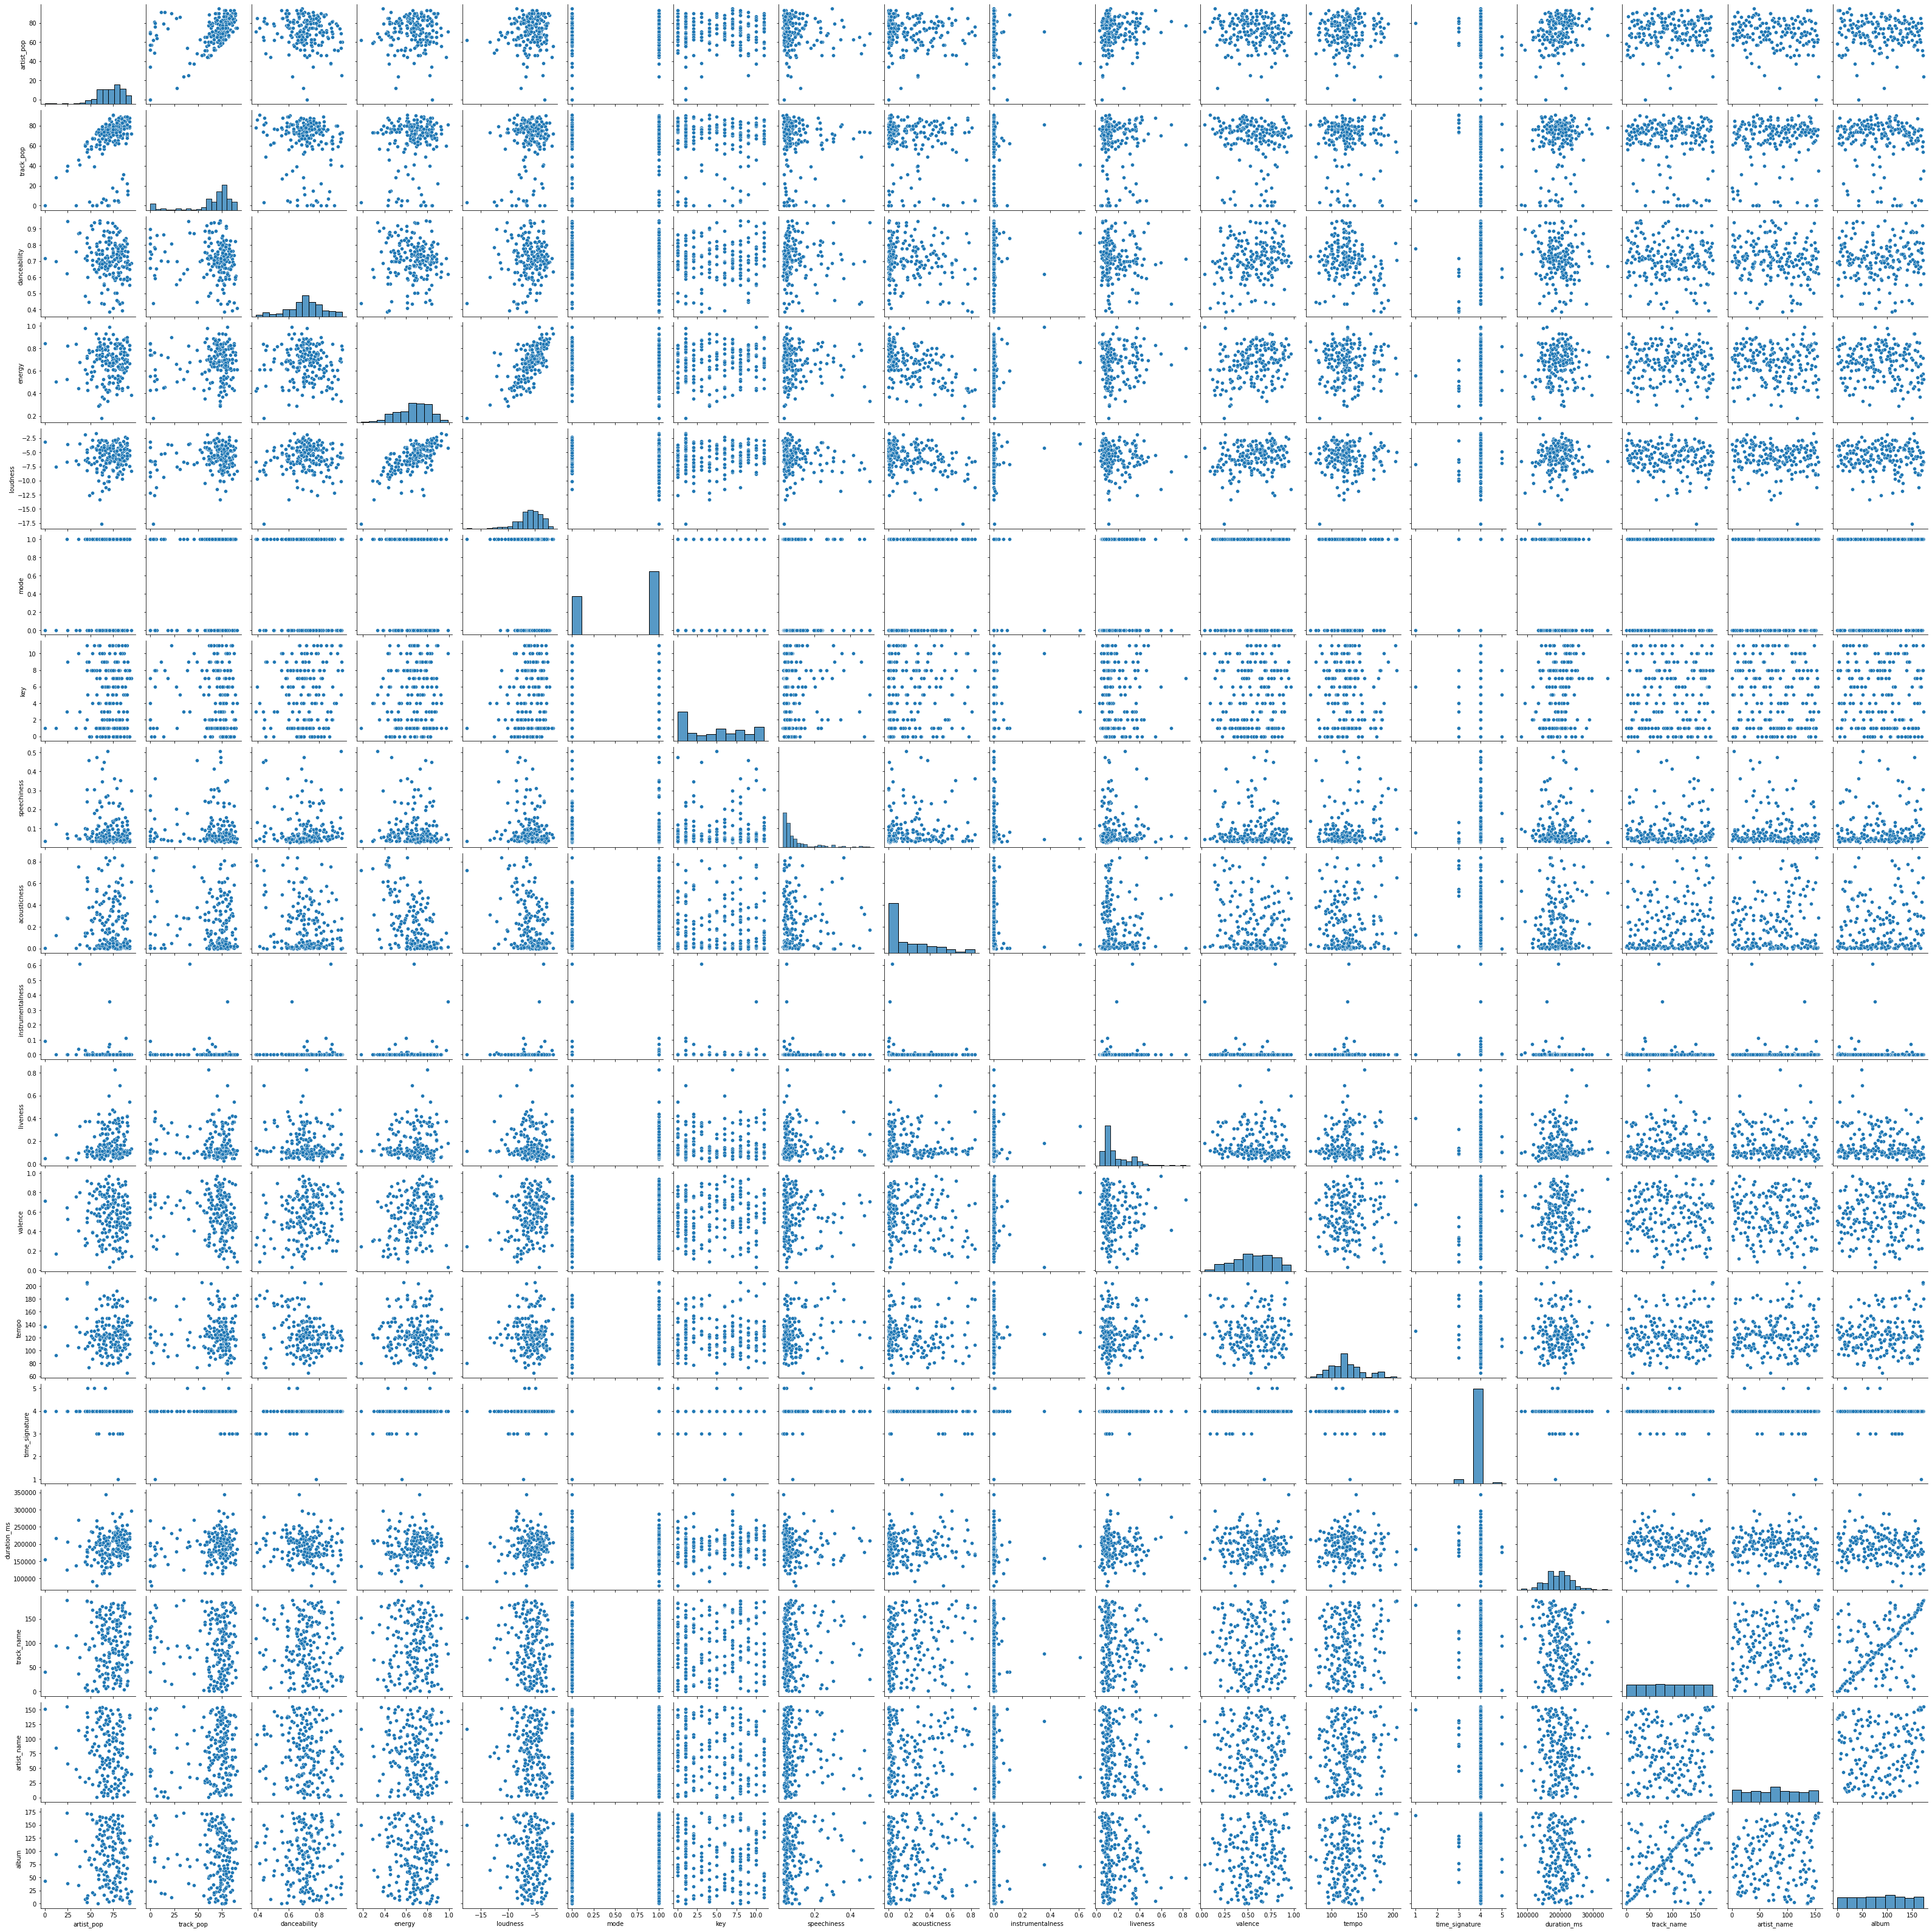

In [241]:
plt.figure(figsize=(10,10))
sns.pairplot(df1)
plt.show()

# bar chart between artist_pop & track_pop

<BarContainer object of 190 artists>

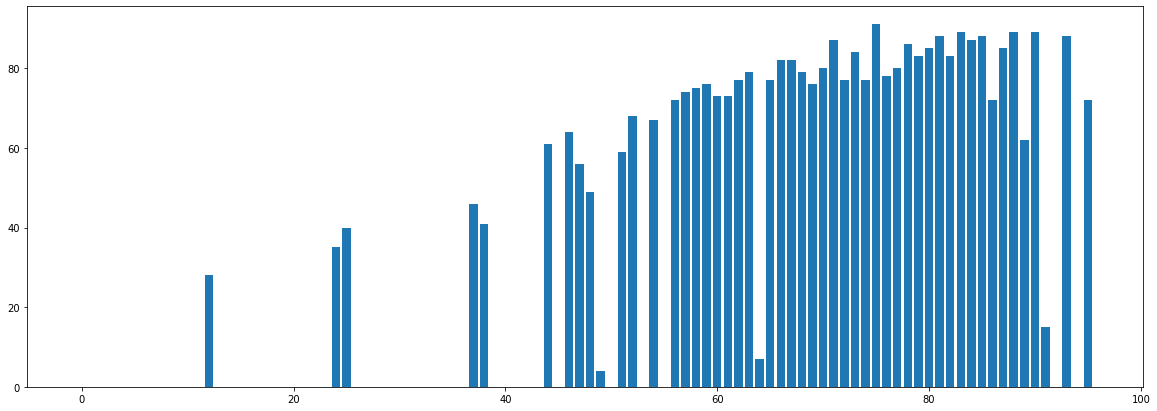

In [242]:
plt.figure(figsize=(20,7))
plt.bar(df1['artist_pop'],df1['track_pop'])

# Histogram

(array([18., 18., 17., 21., 18., 19., 26., 17., 17., 19.]),
 array([  0. ,  17.3,  34.6,  51.9,  69.2,  86.5, 103.8, 121.1, 138.4,
        155.7, 173. ]),
 <BarContainer object of 10 artists>)

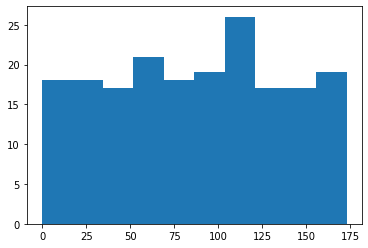

In [243]:
plt.hist(df1['album'])

(array([21., 15., 21., 16., 24., 18., 23., 15., 17., 20.]),
 array([  0. ,  15.5,  31. ,  46.5,  62. ,  77.5,  93. , 108.5, 124. ,
        139.5, 155. ]),
 <BarContainer object of 10 artists>)

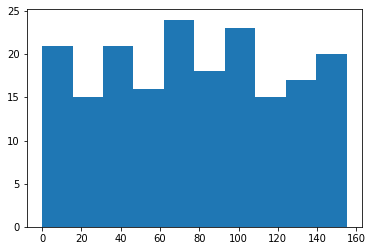

In [244]:
plt.hist(df1['artist_name'])

(array([ 1.,  1.,  2.,  2.,  8., 11., 39., 44., 53., 29.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <BarContainer object of 10 artists>)

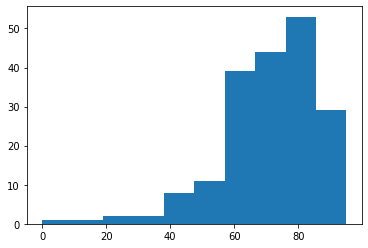

In [245]:
plt.hist(df1['artist_pop'])

# Pie Chart

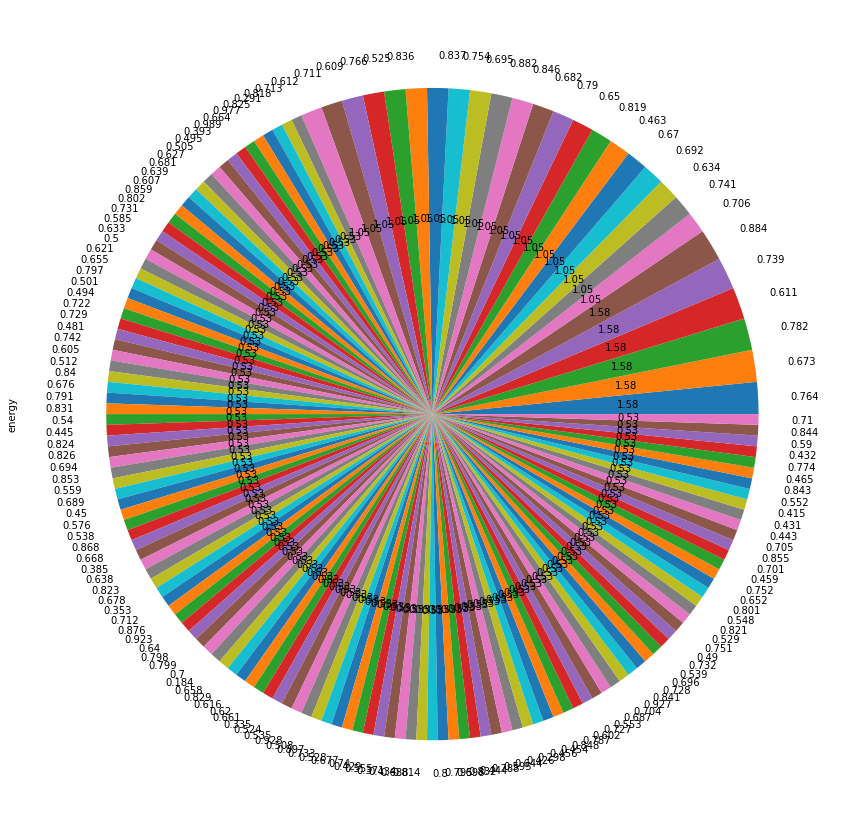

In [246]:
plt.figure(figsize = (20,15))
df1['energy'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

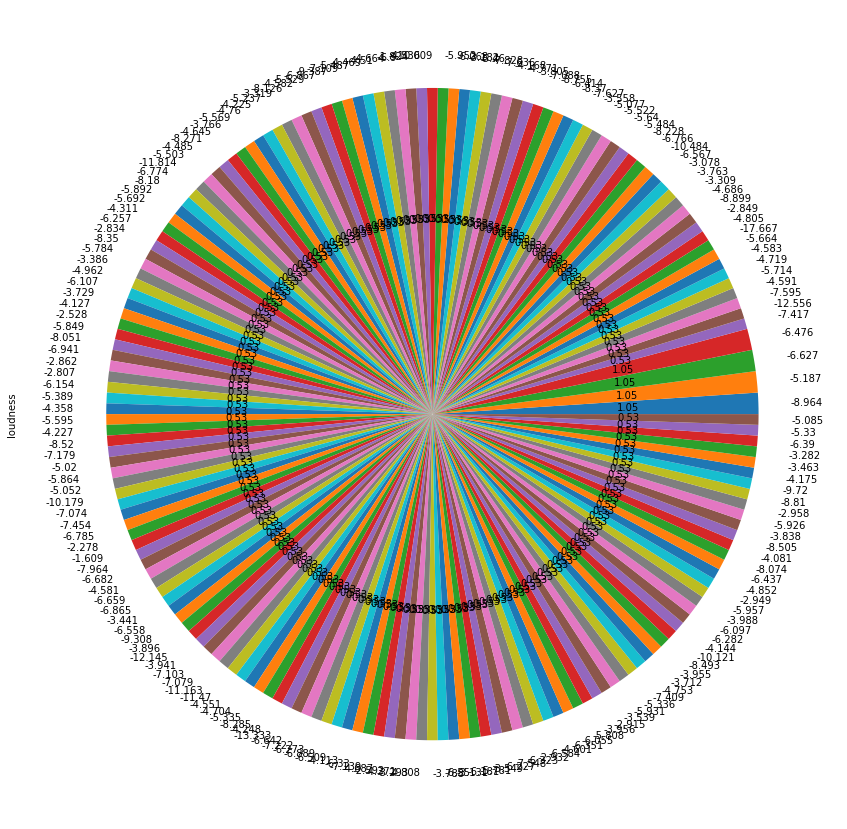

In [247]:
plt.figure(figsize = (20,15))
df1['loudness'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

# HeatMap

<AxesSubplot:>

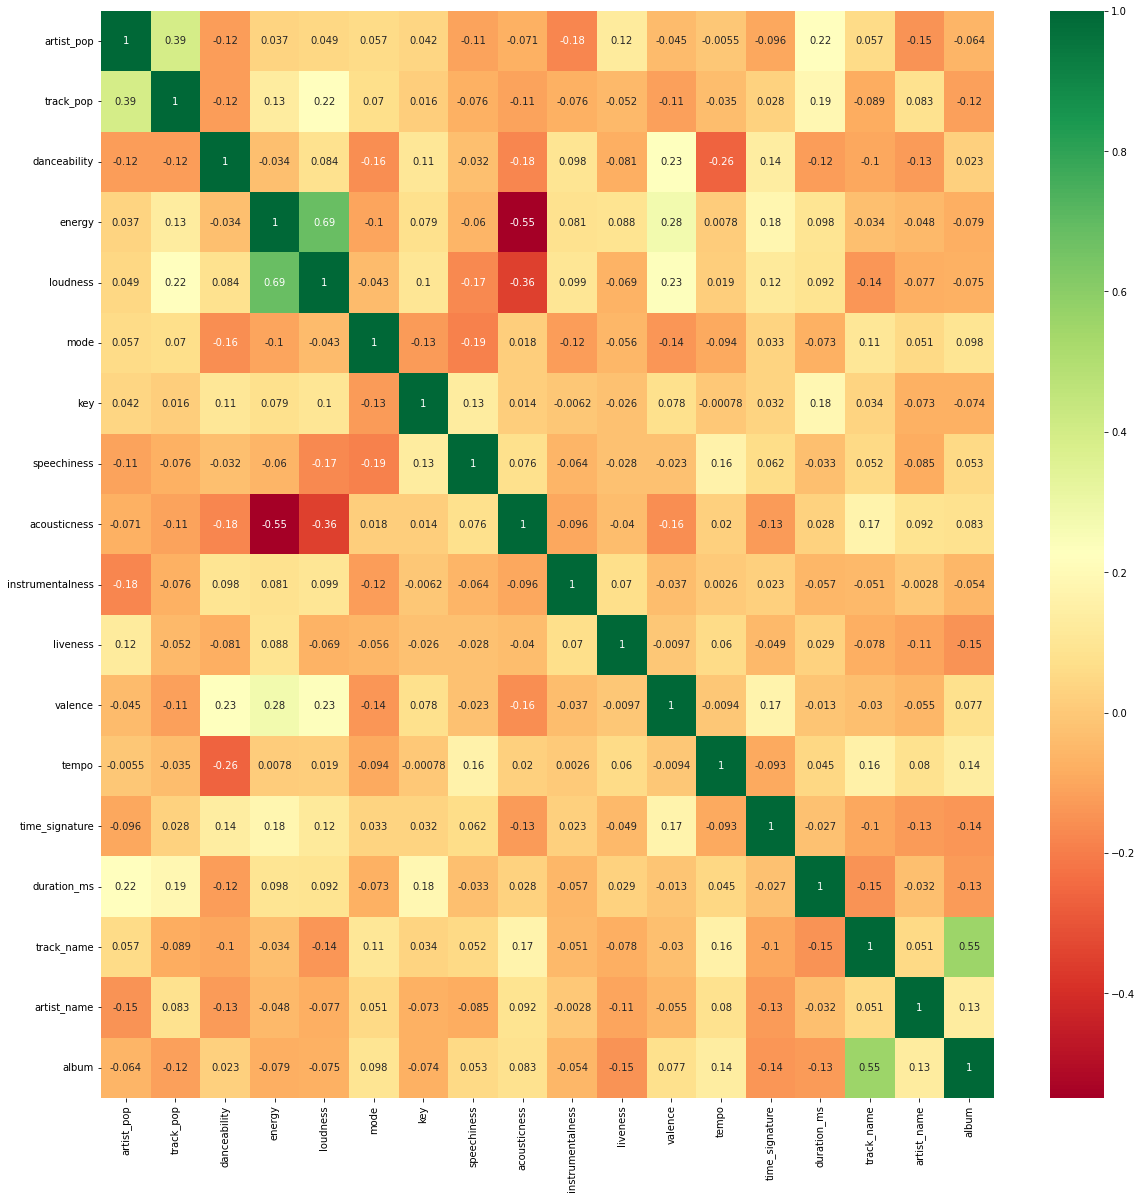

In [248]:
# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df1.corr(), annot=True, cmap='RdYlGn')

# Separating Features and Target Variable

In [249]:
X = df.drop('time_signature', axis=1)
y = df1['time_signature']

In [250]:
x

,Rank,Year,NASales,EUSales,JPSales,OtherSales,GlobalSales,Name,Platform,Publisher
0,-1.729615,-0.069538,50.126469,56.691515,11.835597,44.253501,52.446423,1.569371,1.217141,0.379404
1,-1.729406,-3.670217,35.036615,6.739357,21.583251,3.796218,25.329663,1.066499,-0.575029,0.379404
2,-1.729197,0.273384,18.949687,25.000169,11.899727,17.159222,22.509520,-0.064962,1.217141,0.379404
3,-1.728989,0.444845,18.828093,21.328372,10.264430,15.317863,20.710243,1.569981,1.217141,0.379404
4,-1.728780,-1.784147,13.380668,17.165692,32.517296,5.006254,19.670236,0.470254,-1.291897,0.379404
...,...,...,...,...,...,...,...,...,...,...
16286,1.733082,-0.755382,-0.310852,-0.290075,-0.252776,-0.254771,-0.338743,1.597749,-1.172419,-0.130117
16287,1.733291,-0.583921,-0.310852,-0.290075,-0.252776,-0.254771,-0.338743,0.002169,-1.052941,-0.288634
16288,1.733500,0.273384,-0.323011,-0.290075,-0.252776,-0.254771,-0.338743,0.711926,0.022361,-1.534129
16289,1.733708,0.616306,-0.323011,-0.270439,-0.252776,-0.254771,-0.338743,-0.234315,-1.411375,-1.607726


In [251]:
y

0      4
1      4
2      4
3      4
4      3
      ..
185    4
186    4
187    4
188    4
189    4
Name: time_signature, Length: 190, dtype: int64

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
X_train.shape

(133, 16)

In [254]:
knn=KNeighborsClassifier(n_neighbors=56)

In [255]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=56)

In [256]:
knn.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this Model is 0.98

In [257]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)

In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# Decision Tree Classifier

In [259]:
dt=DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(dt, X, y, cv=10)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.9122807017543859

# As we can see the Testing Accuracy for this Model is 0.91

In [260]:
y_pred=dt.predict(X_test)

In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      0.93      0.95        56

    accuracy                           0.91        57
   macro avg       0.49      0.46      0.48        57
weighted avg       0.96      0.91      0.94        57



# Random Forest Classifier

In [262]:
rf = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(rf, X, y, cv=5)

In [263]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this Model is 0.98

In [264]:
y_pred=rf.predict(X_test)

In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# Support Vector machine Classifier

In [266]:
svc = SVC(kernel='poly',degree=5)
cvs_scores = cross_val_score(svc, X, y, cv=5)
svc.fit(X_train, y_train)

SVC(degree=5, kernel='poly')

In [267]:
svc.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this SVM Model is 0.98

In [268]:
y_pred=svc.predict(X_test)

In [269]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# logistic regression

In [270]:
lr=LogisticRegression(random_state=0)
cvs_scores = cross_val_score(lr, X, y, cv=5)
cvs_scores

array([0.92105263, 0.94736842, 0.94736842, 0.92105263, 0.92105263])

In [271]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this Logistic Regression Model is 0.98

In [273]:
y_pred=lr.predict(X_test)

In [274]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



In [275]:
X_train

,artist_pop,track_pop,danceability,energy,loudness,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_name,artist_name,album
26,85,27,0.556,0.661,-5.052,6,0.2040,0.3000,0.000000,0.1010,0.6680,168.560,178148,177,107,167
38,38,41,0.875,0.677,-3.441,3,0.0467,0.0391,0.611000,0.3320,0.7980,128.015,194955,70,35,71
117,57,61,0.793,0.706,-4.536,5,0.0695,0.3320,0.000000,0.0752,0.8390,95.992,176532,46,1,99
156,64,7,0.859,0.525,-8.051,1,0.0592,0.4340,0.000023,0.1080,0.3120,110.066,204764,112,3,114
133,80,65,0.766,0.640,-8.899,0,0.0345,0.0510,0.000000,0.2370,0.6700,100.044,165600,172,150,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,73,84,0.727,0.739,-3.805,8,0.0411,0.3650,0.001370,0.1610,0.5330,93.005,145800,181,19,22
14,37,46,0.873,0.444,-7.139,10,0.0441,0.7520,0.039300,0.0979,0.4060,105.017,270048,36,115,35
92,66,75,0.669,0.687,-4.753,0,0.0430,0.1520,0.000016,0.3080,0.3860,123.903,145161,107,90,107
179,71,81,0.621,0.989,-4.225,10,0.0434,0.0150,0.357000,0.1840,0.0348,126.002,158095,78,130,75


# Ada boosting

In [276]:
ab=AdaBoostClassifier(n_estimators=100, random_state=0)
cvs_scores = cross_val_score(ab, X, y, cv=5)

In [277]:
ab.fit(X_train,y_train)
ab.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this Ada Boosting Model is 0.98

In [278]:
y_pred=ab.predict(X_test)

In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# gradient boosting

In [280]:
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0)
cvs_scores = cross_val_score(gb, X, y, cv=5)

In [281]:
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.9824561403508771

# As we can see the Testing Accuracy for this gradient boosting Model is 0.98

In [282]:
y_pred=gb.predict(X_test)

In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# Implmenting Extreme Boosting Classifier with Hyperparameter Tuning

In [295]:
for i in np.logspace(-3, 3, 7):
     print(i)

0.001
0.01
0.1
1.0
10.0
100.0
1000.0


In [296]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [297]:
grid = GridSearchCV(LogisticRegression(), #model
                    parameters, #hyperparameters
                    verbose=3, #way of computation
                    cv=5, #cross validation
                    scoring="accuracy") #metrics

In [298]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.926 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solv

[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.926 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.923 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.923 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.926 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.889 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.926 total time=   0.0s
[CV 3/5] END C

[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.923 total time=   0.0s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.846 total time=   0.0s
[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.926 total time=   0.0s
[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.815 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.926 total time=   0.0s
[CV 3/5] END C=1.0, p

[CV 1/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.889 total time=   0.1s
[CV 3/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.923 total time=   0.0s
[CV 5/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 1/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 2/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.926 total time=   0.0s
[CV 3/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 5/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.923 total time=   0.0s
[CV 1/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.852 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.926 total time=   0.0s
[CV 3/5

[CV 5/5] END .C=1000.0, penalty=l2, solver=saga;, score=0.923 total time=   0.0s
[CV 1/5] END C=1000.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000.0, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000.0, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [299]:
grid.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [300]:
grid.best_score_

0.9173789173789174

In [301]:
grid.best_estimator_

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [305]:
print(f"Test Set accuracy : {accuracy_score(y_test,y_pred) * 100} %\n\n")
print(classification_report(y_test,y_pred))

Test Set accuracy : 98.24561403508771 %


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.98      1.00      0.99        56

    accuracy                           0.98        57
   macro avg       0.49      0.50      0.50        57
weighted avg       0.97      0.98      0.97        57



# As we can see the Testing Accuracy for this Model is 98.24

# In the summary, we can see that we get the most accuracy of 98.24% in Hyperparameter Tuning